# Персонализированные предложения постоянным клиентам интернет-магазина «В один клик»

**Описание проекта**: Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  

**Цель исследования**: Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Ход исследования:**

- *Шаг 1.* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
- *Шаг 2.* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- *Шаг 3.* Исследовательский анализ данных.
- *Шаг 4.* Объединение таблиц.
- *Шаг 5.* Корреляционный анализ данных.
- *Шаг 6.* Использование пайплайнов.
- *Шаг 7.* Анализ важности признаков.
- *Шаг 8.* Сегментация покупателей.
- *Шаг 9.* Выводы.

**Общий вывод**: По итогам проведенного анализа удастся сформулировать рекомендации по критериям для внедрения персонализированных предложений постоянным клиентам интернет-магазина «В один клик». Разработанная модель машинного обучения поможет предсказывать вероятность снижения покупательской активности и опреативно предлагать персонализированные скидки, что в перспективе поможет увеличить покупательскую активность и прибыль интернет-магазина. 

**Описание данных**

`market_file.csv`. Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv`. -- Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

`market_time.csv`. Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

`money.csv`. Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

In [1]:
# Установим библиотеки, которые понадобятся для работы над проектом. 

!pip install -q phik
!pip install -q shap


In [2]:
# Переустанавливаем версию matplotlib для визуализации SHAP
!pip install -q matplotlib==3.5.1

# Обновляем scikit-learn, так как выдавал ошибки при запуске кода из теории
!pip install -Uq scikit-learn


In [3]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 
import time

# для датафрейма 
import pandas as pd
import numpy as np

# для визуализации 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# для статистики
import phik
from scipy import stats as st
from phik import report
from phik.report import plot_correlation_matrix

# для машинного обучения
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# модели 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV 

# метрики
from sklearn.metrics import roc_auc_score


In [4]:
# Проверим версию matplotlib

print(matplotlib.__version__)

3.5.1


In [5]:
# Зафисируем константы

RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка данных

In [6]:
# Функция вывода основной информации о файлах-датафреймах

def main_info(df):
    # Информация о структуре датафрейма
    print("Информация о структурах:")
    display(df.info())
    print("\n")
    
    # Статистическое описание колонок
    print("Статистика:")
    display(df.describe().T)
    print("\n")
    
    # Первые десять строк датафрейма
    print("Первые строки:")
    display(df.head(10))
    print("\n\n")

In [7]:
# Считаем данные из csv-файлов в датафрейм и сохраним в переменные. 

try:
    market_file = pd.read_csv('/datasets/market_file.csv')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    
try:
    market_money = pd.read_csv('/datasets/market_money.csv')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    
try:
    market_time = pd.read_csv('/datasets/market_time.csv')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    
try:
    money = pd.read_csv('/datasets/money.csv', sep=';')
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')

In [8]:
# Выведем основную информацию о датафрейме market_file

main_info(market_file)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибк

None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
Маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
Акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00




Первые строки:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
5,215353,Снизилась,стандартт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4
6,215354,Снизилась,стандартт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2
7,215355,Снизилась,стандартт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4
8,215356,Снизилась,стандартт,да,4.2,4,192,0.14,Косметика и аксесуары,2,2,1,3
9,215357,Снизилась,стандартт,да,3.9,5,154,0.00,Техника для красоты и здоровья,3,3,9,5


**Комментарии**

Датасет из файла `market_file.csv` мы сохранили в переменную `market_file`. Он содержит 1300 строк, пропусков нет. На первый взгляд типы данных распределены корректно. Необходимо привести названия столбцов к нижнему регистру и snake_case. Также в столбце `Тип сервиса` есть опечатка.

In [9]:
# Выведем основную информацию о датафрейме market_money

main_info(market_money)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.500000,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
Выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.00,106862.2




Первые строки:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4
8,215350,предыдущий_месяц,5457.5
9,215351,текущий_месяц,6610.4


**Комментарии**

Датасет из файла `market_money.csv` мы сохранили в переменную `market_money`. Он содержит 3900 строк, пропусков нет. На первый взгляд типы данных распределены корректно. Необходимо привести названия столбцов к нижнему регистру.

In [10]:
# Выведем основную информацию о датафрейме market_time

main_info(market_time)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0




Первые строки:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13
7,215351,предыдцщий_месяц,11
8,215352,текущий_месяц,11
9,215352,предыдцщий_месяц,8


**Комментарии**

Датасет из файла `market_time.csv` мы сохранили в переменную `market_time`. Он содержит 2600 строк, пропусков нет. На первый взгляд типы данных распределены корректно. Необходимо привести названия столбцов к нижнему регистру, а также в столбце `Период` исправить опечатку.

In [11]:
# Выведем основную информацию о датафрейме money

main_info(money)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.5,375.421985,215348.0,215672.75,215997.5,216322.25,216647.0




Первые строки:


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"
5,215353,"3,95"
6,215354,"3,62"
7,215355,"5,26"
8,215356,"4,93"
9,215357,"4,66"


**Комментарии**

Датасет из файла `money.csv` мы сохранили в переменную `money`. Он содержит 1300 строк, пропусков нет. Необходимо привести названия столбцов к нижнему регистру. В столбце `Прибыль` нужно заменить разделитель дробной части запятую на точку и изменить тип данных.

**Вывод**

Полученные данные мы сохранили в четыре переменные: `market_file` для датафрейма с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении; `market_money` для данных о выручке, которую получает магазин с покупателя; `market_time` для данных о времени, которое покупатель провёл на сайте в течение периода; `money` для данных о среднемесячной прибыли продавца за последние 3 месяца. В данных отсутствуют пропуски, на текщем этапе данные соответствуют описанию задачи. 

##  Предобработка данных

### Переименовывание названий столбцов

In [12]:
# Напишем функцию, заменяющую пробелы на нижние подчеркивания и переводящую в нижний регистр строки

def normalize_col_names(col_names):
    return [col.lower().replace(' ', '_') for col in col_names]

In [13]:
# Переименовываем столбцы в датафрейме market_file

market_file.columns = normalize_col_names(market_file.columns)

# Проверяем результат

print(market_file.info())
display(market_file.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [14]:
# Переименовываем столбцы в датафрейме market_money

market_money.columns = normalize_col_names(market_money.columns)

# Проверяем результат

print(market_money.info())
display(market_money.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [15]:
# Переименовываем столбцы в датафрейме market_time

market_time.columns = normalize_col_names(market_time.columns)

# Проверяем результат

print(market_time.info())
display(market_time.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [16]:
# Переименовываем столбцы в датафрейме money

money.columns = normalize_col_names(money.columns)

# Проверяем результат

print(money.info())
display(money.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None


,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


### Обработка дубликатов


In [17]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме market_file:', market_file.duplicated().sum())
display(market_file.loc[market_file.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме market_money:', market_money.duplicated().sum())
display(market_money.loc[market_money.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме market_time:', market_time.duplicated().sum())
display(market_time.loc[market_time.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме money:', money.duplicated().sum())
display(money.loc[money.duplicated(keep=False)])

Количество явных дубликатов в датафрейме market_file: 0


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


Количество явных дубликатов в датафрейме market_money: 0


,id,период,выручка


Количество явных дубликатов в датафрейме market_time: 0


,id,период,минут


Количество явных дубликатов в датафрейме money: 0


,id,прибыль


In [18]:
# Посмотрим на уникальные значения в категориальных данных в датафреймах

print('Датафрейм "market_file"')
print('Покупательская активность:', ", ".join(market_file['покупательская_активность'].unique()))
print('Тип сервиса:', ", ".join(market_file['тип_сервиса'].unique()))
print('Согласие на рассылку:', ", ".join(market_file['разрешить_сообщать'].unique()))
print('Популярная категория:', ", ".join(market_file['популярная_категория'].unique()))
print()
print('Датафрейм "market_money"')
print('Период:', ", ".join(market_money['период'].unique()))
print()
print('Датафрейм "market_time"')
print('Период:', ", ".join(market_time['период'].unique()))


Датафрейм "market_file"
Покупательская активность: Снизилась, Прежний уровень
Тип сервиса: премиум, стандартт, стандарт
Согласие на рассылку: да, нет
Популярная категория: Товары для детей, Домашний текстиль, Косметика и аксесуары, Техника для красоты и здоровья, Кухонная посуда, Мелкая бытовая техника и электроника

Датафрейм "market_money"
Период: препредыдущий_месяц, текущий_месяц, предыдущий_месяц

Датафрейм "market_time"
Период: текущий_месяц, предыдцщий_месяц


**Комментарии**

Явныех дубликатов в датафреймах нет, но есть неявные. Так в датафрейме `market_file` в столбце `тип_сервиса` есть неявные дубликаты из-за опечаток, их необходимо исправить. В датафрейме `market_time` в столбце `период` тоже есть опечатка, она может вызвать ошибки при дальнейшем объединении всех датафреймов в один. Дополнительно приведем все категориальные данные к нижнему регистру и snake_case.

In [19]:
# Преобразуем данные 

market_file['тип_сервиса'] = (
    market_file['тип_сервиса']
    .str.replace('стандартт', 'стандарт')
) 

market_file['покупательская_активность'] = (
    market_file['покупательская_активность']
    .str.replace(' ', '_')
    .str.lower() # приведем к нижнему регистру
)

market_file['популярная_категория'] = (
    market_file['популярная_категория']
    .str.replace(' ', '_')
    .str.lower() # приведем к нижнему регистру
    .str.replace('косметика_и_аксесуары', 'косметика_и_аксессуары')
)

market_time['период'] = (
    market_time['период']
    .str.replace('предыдцщий_месяц', 'предыдущий_месяц')
)


In [20]:
# Проверим результат
# Посмотрим на уникальные значения в категориальных данных в датафреймах

print('Датафрейм "market_file"')
print('Покупательская активность:', ", ".join(market_file['покупательская_активность'].unique()))
print('Тип сервиса:', ", ".join(market_file['тип_сервиса'].unique()))
print('Согласие на рассылку:', ", ".join(market_file['разрешить_сообщать'].unique()))
print('Популярная категория:', ", ".join(market_file['популярная_категория'].unique()))
print()
print('Датафрейм "market_money"')
print('Период:', ", ".join(market_money['период'].unique()))
print()
print('Датафрейм "market_time"')
print('Период:', ", ".join(market_time['период'].unique()))

Датафрейм "market_file"
Покупательская активность: снизилась, прежний_уровень
Тип сервиса: премиум, стандарт
Согласие на рассылку: да, нет
Популярная категория: товары_для_детей, домашний_текстиль, косметика_и_аксессуары, техника_для_красоты_и_здоровья, кухонная_посуда, мелкая_бытовая_техника_и_электроника

Датафрейм "market_money"
Период: препредыдущий_месяц, текущий_месяц, предыдущий_месяц

Датафрейм "market_time"
Период: текущий_месяц, предыдущий_месяц


In [21]:
# Проверим наличие явных дубликатов повторно

print('Количество явных дубликатов в датафрейме market_file:', market_file.duplicated().sum())
display(market_file.loc[market_file.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме market_money:', market_money.duplicated().sum())
display(market_money.loc[market_money.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме market_time:', market_time.duplicated().sum())
display(market_time.loc[market_time.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме money:', money.duplicated().sum())
display(money.loc[money.duplicated(keep=False)])

Количество явных дубликатов в датафрейме market_file: 0


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит


Количество явных дубликатов в датафрейме market_money: 0


,id,период,выручка


Количество явных дубликатов в датафрейме market_time: 0


,id,период,минут


Количество явных дубликатов в датафрейме money: 0


,id,прибыль


**Комментарии**

Всё отлично. Явных дубликатов нет, он неявных мы избавились и привели категориальные данные к единообразию.

### Преобразование типа данных

In [22]:
# Замена запятых на точки в столбце "прибыль" в датафрейме money

money['прибыль'] = money['прибыль'].str.replace(',', '.')

# Меняем типы данных 

money['прибыль'] = pd.to_numeric(money['прибыль'], errors='coerce').astype('float64')

# Проверяем результат

print(money.info())
display(money.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


**Комментарии**

Мы заменили запятые на точки в датафрейме `money` в столбце `прибыль`. Возможно, также имеет смысл в датафрейме `market_file` в столбце `разрешить_сообщать` изменить тип данных на bool, но пока оставим так как есть.

### Обработка пропусков. 


In [23]:
# Повторно проверим количество пропущенных значений для каждого столбца во всех датафреймах.

print('Пропущенные значения в датафрейме market_file:', market_file.isna().sum())
print('Пропущенные значения в датафрейме market_money:', market_money.isna().sum())
print('Пропущенные значения в датафрейме market_time:', market_time.isna().sum())
print('Пропущенные значения в датафрейме money:', money.isna().sum())

Пропущенные значения в датафрейме market_file: id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
Пропущенные значения в датафрейме market_money: id         0
период     0
выручка    0
dtype: int64
Пропущенные значения в датафрейме market_time: id        0
период    0
минут     0
dtype: int64
Пропущенные значения в датафрейме money: id         0
прибыль    0
dtype: int64


**Вывод**

В настоящем разделе мы провели первичную предобработку данных: изменили названия столбцов в датафреймах, преобразовали типы данных, проверили явные и обработали неявные дубликаты. Пропусков в данных нет. Можно приступать к исследовательскому анализу данных.


## Исследовательский анализ данных

In [24]:
# Для начала выведем размер все датафреймов

print('Датафрейм market_file:', market_file.shape)
print('Датафрейм market_money:', market_money.shape)
print('Датафрейм market_time:', market_time.shape)
print('Датафрейм money:', money.shape)

# Затем отберём пользователей, которые совершали покупки за последние три месяца

non_active_id = market_money.loc[market_money['выручка'] == 0, 'id'].unique()

# Убираем неактивных пользователей из всех датафреймов

market_file = market_file[~market_file['id'].isin(non_active_id)]
market_money = market_money[~market_money['id'].isin(non_active_id)]
market_time = market_time[~market_time['id'].isin(non_active_id)]
money = money[~money['id'].isin(non_active_id)]


Датафрейм market_file: (1300, 13)
Датафрейм market_money: (3900, 3)
Датафрейм market_time: (2600, 3)
Датафрейм money: (1300, 2)


In [25]:
# Проверим результат

print('Датафрейм market_file:', market_file.shape)
print('Датафрейм market_money:', market_money.shape)
print('Датафрейм market_time:', market_time.shape)
print('Датафрейм money:', money.shape)

Датафрейм market_file: (1297, 13)
Датафрейм market_money: (3891, 3)
Датафрейм market_time: (2594, 3)
Датафрейм money: (1297, 2)


**Комментарии**

У нас получилось 3 неактивных пользователя, которых мы удалили. Так как в датафреймах `market_money` и `market_time` несколько периодов для каждого id, то удаленных значений больше.

### Датафрейм `market_file`

In [26]:
# Сохраним количественные и категориальные колонки в разные переменные для дальнейшей визуализации

cat_col_market_file = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

num_col_market_file = ['маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',\
                       'ошибка_сервиса', 'страниц_за_визит']

hist_col_market_file = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки']


In [27]:
# Статистическое описание колонок

print("Статистика:")
display(market_file.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
id,1297.0,215998.986893,374.578554,215349.00,215675.00,215999.00,216323.0,216647.00
маркет_актив_6_мес,1297.0,4.254433,1.015618,0.90,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1297.0,4.009252,0.696048,3.00,4.00,4.00,4.0,5.00
длительность,1297.0,602.993832,249.101456,121.00,410.00,607.00,806.0,1079.00
акционные_покупки,1297.0,0.320547,0.249657,0.11,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1297.0,3.267540,1.354623,1.00,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1297.0,2.841172,1.973451,0.00,1.00,3.00,4.0,10.00
ошибка_сервиса,1297.0,4.184271,1.950973,0.00,3.00,4.00,6.0,9.00
страниц_за_визит,1297.0,8.186584,3.977061,1.00,5.00,8.00,11.0,20.00


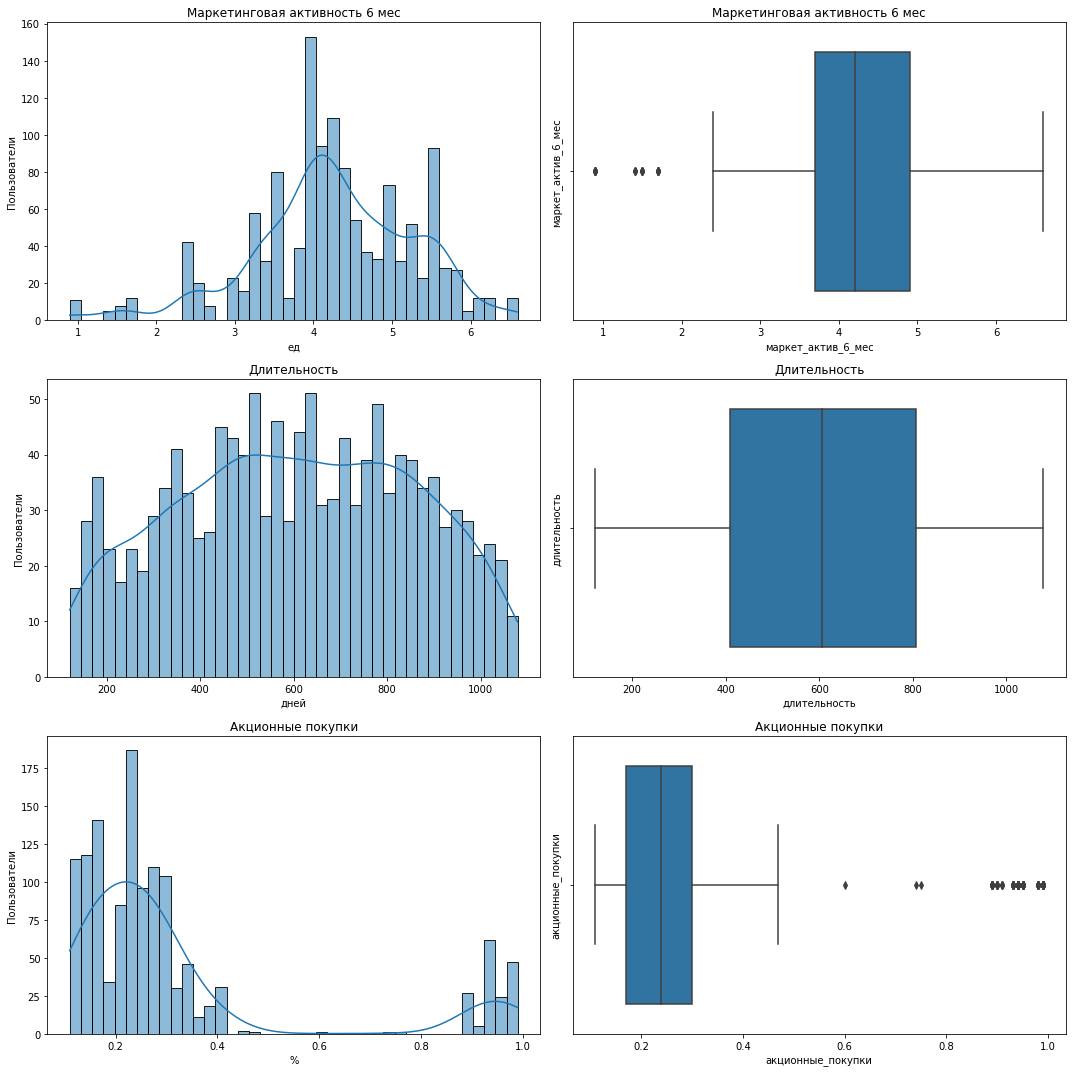

In [28]:
# Построим гистограммы и диаграмма размаха для всех непрерывных числовых столбцов таблицы на одном графике.

columns = hist_col_market_file  # Колонки для анализа
titles = ['Маркетинговая активность 6 мес', 'Длительность', 'Акционные покупки']  # Заголовки для осей
xlabels = ['ед', 'дней', '%']  # Подписи оси X

# Строим сетку графиков: каждая колонка делится на две части (гистограмма и бокс-плот)
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 15))

for i, col in enumerate(columns):
    # Левый график — гистограмма
    sns.histplot(data=market_file, x=col, ax=axes[i][0], bins=40, kde=True)
    axes[i][0].set_title(titles[i])
    axes[i][0].set_xlabel(xlabels[i])
    axes[i][0].set_ylabel('Пользователи')
    
    # Правый график — диаграмма размаха
    sns.boxplot(data=market_file, x=col, orient='h', ax=axes[i][1])
    axes[i][1].set_title(titles[i])
    axes[i][1].set_ylabel(col)

plt.tight_layout()
plt.show()

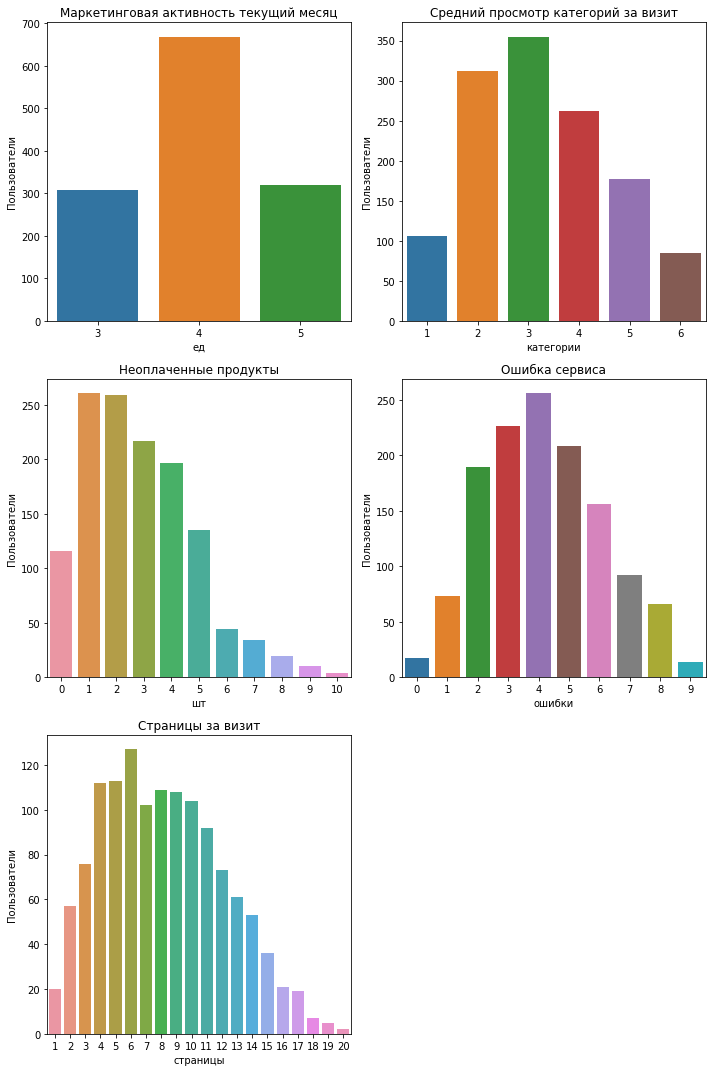

In [29]:
# Построим столбчатые диаграммы для всех дискретных числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(10, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = num_col_market_file # Колонки для анализа
titles = ['Маркетинговая активность текущий месяц', 'Средний просмотр категорий за визит', 'Неоплаченные продукты', 
          'Ошибка сервиса', 'Страницы за визит']  # Заголовки для осей
xlabels = ['ед', 'категории', 'шт', 'ошибки', 'страницы']  # Подписи оси х

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.countplot(data=market_file, x=col, ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Пользователи')

# Удаляем пустые места, если кол-во колонок меньше 6
if len(columns) < 6:
    for ax in axes[len(columns):]:
        ax.axis('off')    
    
plt.tight_layout()
plt.show()


**Комментарии**

В целом большая часть гистограмм и столбчатых диаграмм похожи на нормальное распределение. Менее равномерными выглядят столбцы `маркет_актив_6_мес` и `акционные_покупки`, но вероятно это индивидуальные особенности покупательского поведения. Также в этих колонках есть незначительные выбросы. Преимущественно все остальные числовые значения находятся в пределах нормы, аномалий не наблюдается, в рамках исследовательского анализа обработка данных признаков не требуется.

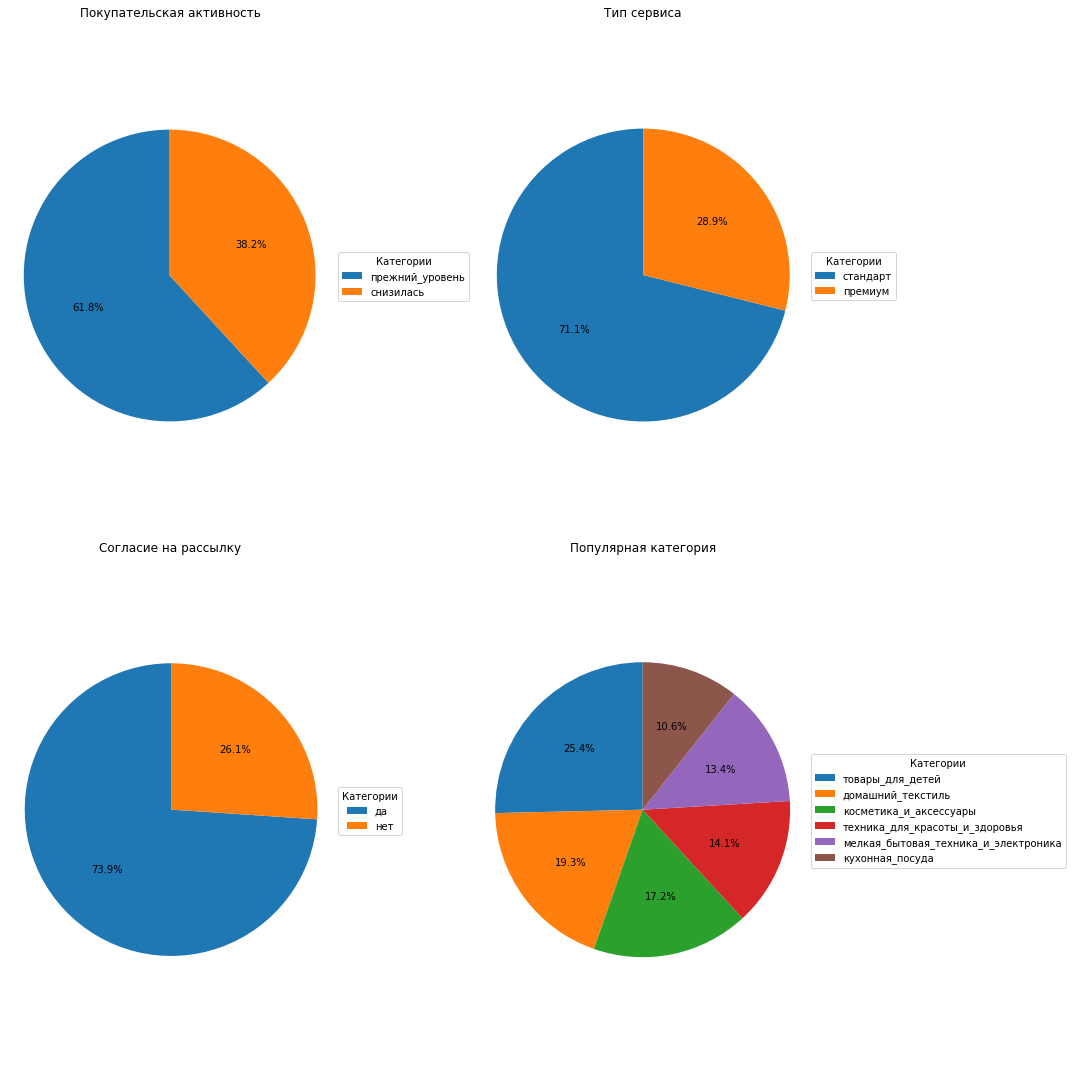

In [30]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = cat_col_market_file # Колонки для анализа
titles = ['Покупательская активность', 'Тип сервиса', 'Согласие на рассылку', 'Популярная категория']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = market_file[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

plt.tight_layout()  
plt.show()

**Комментарии**

Проанализировав категориальные данные в датафрейме `market_file` можно сделать следующие выводы:
- Более половины пользователей сохранили прежнюю покупательскую активность (61.8%).
- Всего треть пользователей используют подписку премиум (28.9%). 
- Три четверти пользователей (73.9%) согласны получать маркетинговые рассылки, что показывает их лояльность к сервису. 
- В интернет-магазине представлено шесть крупных категорий товаров (товары для детей, домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда). Распределение предпочтений пользователей примерно равномерно и находится в районе 10-25%. Наиболее приоритетными стали категории "товары для детей" и "домашний текстиль".

### Датафрейм `market_money`

In [31]:
# Статистическое описание колонок

print("Статистика:")
display(market_money.describe().T)
print('Датафрейм market_money:', market_money.shape)


Статистика:


,count,mean,std,min,25%,50%,75%,max
id,3891.0,215998.986893,374.482249,215349.0,215675.0,215999.0,216323.0,216647.0
выручка,3891.0,5033.718890,1768.471286,2758.7,4592.0,4959.0,5363.2,106862.2


Датафрейм market_money: (3891, 3)


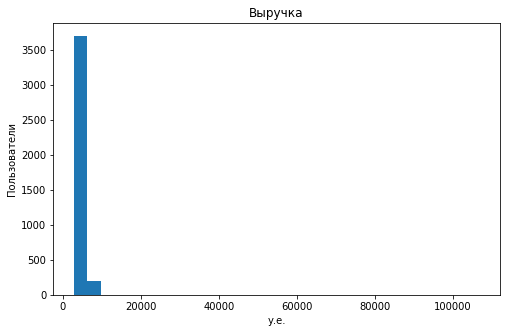

In [32]:
# Построим гистограмму столбца "выручка".

plt.figure(figsize=(8, 5))
market_money['выручка'].hist(bins=30, grid=True)
plt.title('Выручка')
plt.xlabel('у.е.')
plt.ylabel('Пользователи')
plt.grid()
plt.show()

In [33]:
# Узнаем какое количество строк приходится на аномальные значения и выведем их

print('Количество строк с выручкой больше 8000 у.е.:',(market_money['выручка'] > 8000).sum())
display(market_money[market_money['выручка'] > 8000])

Количество строк с выручкой больше 8000 у.е.: 1


,id,период,выручка
98,215380,текущий_месяц,106862.2


**Комментарии**

В столбце `выручка` можно заметить один выброс, так как максимальное значение 106862.2, а 75% всех значений лежит в пределах 5363.2. Это аномально большое значение необходимо удалить. 

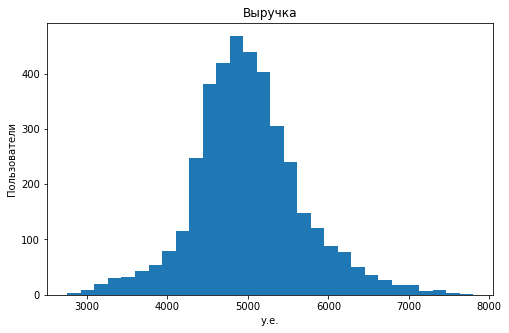

In [34]:
# Удаляем строку с анамалией

market_money = market_money[~(market_money['выручка'] > 8000)]

#Выводим обновленную гистаграмму

plt.figure(figsize=(8, 5))
market_money['выручка'].hist(bins=30, grid=True)
plt.title('Выручка')
plt.xlabel('у.е.')
plt.ylabel('Пользователи')
plt.grid()
plt.show()

**Комментарии**

После удаления выброса гистограмма столца `выручка` приняла вид нормального распределения. Неизвестно в какой валюте указана выручка, поэтому для визуализации мы использовали обозначение "у.е.". 

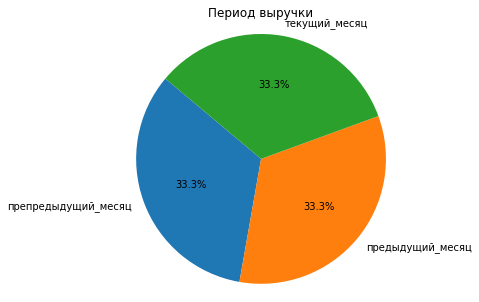

In [35]:
# Построим круговую диаграмму для столбца 'период'

# Данные для круговой диаграммы

counts = market_money['период'].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
labels = counts.index  # Метки категорий
sizes = counts.values  # Доли значений

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг
plt.title("Период выручки")
plt.show()


In [36]:
# Разделим данные в зависимости от периода для дальнейшей визуализации

marker_money_current = market_money[market_money['период'] == 'текущий_месяц']
marker_money_previous = market_money[market_money['период'] == 'предыдущий_месяц']
marker_money_before = market_money[market_money['период'] == 'препредыдущий_месяц']


# Проверим результат

display(marker_money_current.head(5))
display(marker_money_previous.head(5))
display(marker_money_before.head(5))


,id,период,выручка
4,215349,текущий_месяц,4971.6
7,215350,текущий_месяц,5058.4
9,215351,текущий_месяц,6610.4
14,215352,текущий_месяц,5872.5
17,215353,текущий_месяц,5388.5


,id,период,выручка
5,215349,предыдущий_месяц,5216.0
8,215350,предыдущий_месяц,5457.5
10,215351,предыдущий_месяц,6158.0
12,215352,предыдущий_месяц,5807.5
15,215353,предыдущий_месяц,4738.5


,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
6,215350,препредыдущий_месяц,4826.0
11,215351,препредыдущий_месяц,4793.0
13,215352,препредыдущий_месяц,4594.0
16,215353,препредыдущий_месяц,5124.0


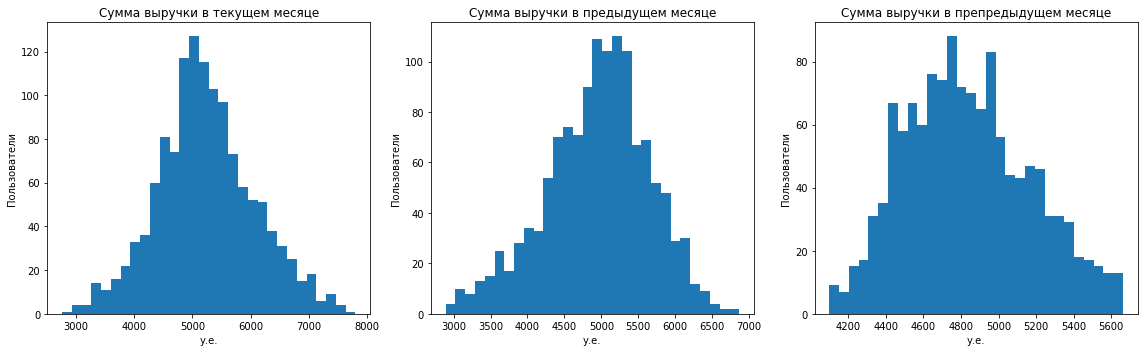

In [37]:
# Построим гистограммы столбца "выручка".

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Первый график
axes[0].hist(marker_money_current['выручка'], bins=30)
axes[0].set_title('Сумма выручки в текущем месяце')
axes[0].set_xlabel('у.е.')
axes[0].set_ylabel('Пользователи')

# Второй график 
axes[1].hist(marker_money_previous['выручка'], bins=30)
axes[1].set_title('Сумма выручки в предыдущем месяце')
axes[1].set_xlabel('у.е.')
axes[1].set_ylabel('Пользователи')

# Третий график 
axes[2].hist(marker_money_before['выручка'], bins=30)
axes[2].set_title('Сумма выручки в препредыдущем месяце')
axes[2].set_xlabel('у.е.')
axes[2].set_ylabel('Пользователи')

plt.tight_layout()
plt.show()

**Комментарии**

Выручка распределена равномерно и нормально по всем трем периодам.

### Датафрейм `market_time`

In [38]:
# Статистическое описание колонок

print("Статистика:")
display(market_time.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2594.0,215998.986893,374.506318,215349.0,215675.0,215999.0,216323.0,216647.0
минут,2594.0,13.340401,4.081999,4.0,10.0,13.0,16.0,23.0


In [39]:
# Разделим данные в зависимости от периода для дальнейшей визуализации

marker_time_current = market_time[market_time['период'] == 'текущий_месяц']
marker_time_previous = market_time[market_time['период'] == 'предыдущий_месяц']

# Проверим результат

display(marker_time_current.head(5))
display(marker_time_previous.head(5))


,id,период,минут
2,215349,текущий_месяц,10
4,215350,текущий_месяц,13
6,215351,текущий_месяц,13
8,215352,текущий_месяц,11
11,215353,текущий_месяц,10


,id,период,минут
3,215349,предыдущий_месяц,12
5,215350,предыдущий_месяц,8
7,215351,предыдущий_месяц,11
9,215352,предыдущий_месяц,8
10,215353,предыдущий_месяц,10


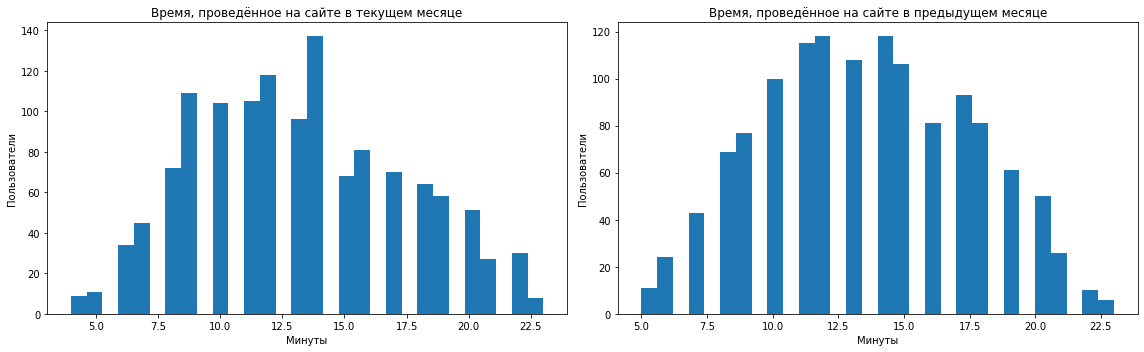

In [40]:
# Построим гистограммы столбца "минут".

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Первый график
axes[0].hist(marker_time_current['минут'], bins=30)
axes[0].set_title('Время, проведённое на сайте в текущем месяце')
axes[0].set_xlabel('Минуты')
axes[0].set_ylabel('Пользователи')

# Второй график 
axes[1].hist(marker_time_previous['минут'], bins=30)
axes[1].set_title('Время, проведённое на сайте в предыдущем месяце')
axes[1].set_xlabel('Минуты')
axes[1].set_ylabel('Пользователи')

plt.tight_layout()
plt.show()

In [41]:
# Построим гистограммы столбца "минут".

# plt.figure(figsize=(8, 5))
# market_time['минут'].hist(bins=30, grid=True)
# plt.title('Время, проведенное на сайте')
# plt.xlabel('мин.')
# plt.ylabel('Пользователи')
# plt.grid()
# plt.show()

**Комментарии**

Гистограмма столца `минут` имеет вид нормального распределения. В среднем пользователи интернет магазина проводят на сайте от 4 до 23 минут. 

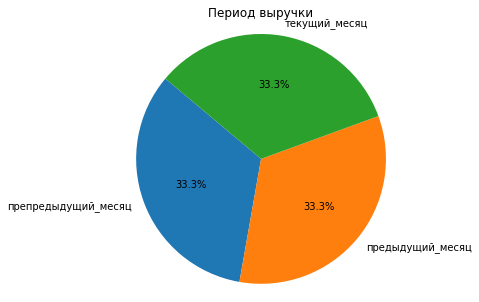

In [42]:
# Построим круговую диаграмму для столбца 'период'

# Данные для круговой диаграммы

counts = market_money['период'].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
labels = counts.index  # Метки категорий
sizes = counts.values  # Доли значений

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг
plt.title("Период выручки")
plt.show()


**Комментарии**

Периоды в датафрейме `market_time` также распределены равномерно.

### Датафрейм `money`

In [43]:
# Статистическое описание колонок

print("Статистика:")
display(money.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
id,1297.0,215998.986893,374.578554,215349.00,215675.0,215999.00,216323.00,216647.00
прибыль,1297.0,3.997610,1.010813,0.86,3.3,4.04,4.67,7.43


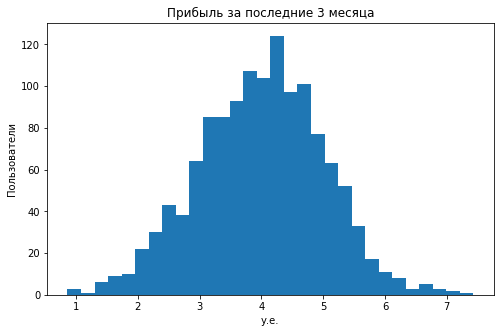

In [44]:
# Построим гистограмму столбца "прибыль".


plt.figure(figsize=(8, 5))
money['прибыль'].hist(bins=30, grid=True)
plt.title('Прибыль за последние 3 месяца')
plt.xlabel('у.е.')
plt.ylabel('Пользователи')
plt.grid()
plt.show()

**Комментарии**

Гистограмма столца `прибыль` также имеет вид нормального распределения. Здесь тоже неизвестно в какой валюте указана выручка,  для визуализации мы использовали обозначение "у.е.", при этом значения в датафреймах `market_money` и `money` на порядок отличаются.  

**Вывод**

На этапе исследовательского анализа данных были проанализированны все признаки в четырех датафреймах. Для количественных данных были построены гистограммы, а для категориальных - круговые диаграммы. Были проанализированы минимальные, максимальные, средние и квартильные значения для каждого из количественных признаков, изучено соотношение для категориальных признаков. Был обнаружен один выброс, который мы удалили. Кроме того, были удалены пользователи, история активности которых не насчитывает трех месяцев.

По результатм анализа мы сделали следующие выводы:
- В целом большая часть гистограмм похожи на нормальное распределение. Менее равномерными выглядят столбцы `маркет_актив_6_мес` и `акционные_покупки` в датафрейме `market_file` , но вероятно это индивидуальные особенности покупательского поведения. Все значения находятся в пределах нормы, выбросов и аномалий не наблюдается, в рамках исследовательского анализа обработка данных признаков не требуется.
- Периоды активности в датафреймах `market_time` и `market_money` распределены равномерно.
- Более половины пользователей сохранили прежнюю покупательскую активность (61.8%).
- Всего треть пользователей используют подписку премиум (28.9%). 
- Три четверти пользователей (73.9%) согласны получать маркетинговые рассылки, что показывает их лояльность к сервису. 
- В интернет-магазине представлено шесть крупных категорий товаров (товары для детей, домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда). Распределение предпочтений пользователей примерно равномерно и находится в районе 10-25%. Наиболее приоритетными стали категории "товары для детей" и "домашний текстиль".
- Неизвестно в какой валюте и в каких единицах считается выручка и прибыль, так как значения в датафрейме `market_money` и `money` на порядок отличаются. 

В следующем разделе мы объединим таблицы для дальнейшего корреляционнонного анализа для изучения взаимосвязи разных признаков. 



## Объединение таблиц

In [45]:
# Для начала выведем размер все датафреймов для объединения

print('Датафрейм market_file:', market_file.shape)
print('Датафрейм market_money:', market_money.shape)
print('Датафрейм market_time:', market_time.shape)


Датафрейм market_file: (1297, 13)
Датафрейм market_money: (3890, 3)
Датафрейм market_time: (2594, 3)


**Комментарии**

Так как количество строк у всех датафреймов разное, то объединив их просто по столбцу `id` мы получим много пропусков. Для этого нужно сделать сводные таблицы для датафреймов `market_money` и `market_time`, а затем объединить все три по столбцу `id`.

In [46]:
# Создаем сводную таблицу дла датафрейма 'market_money' по столбцу 'id'

pivot_market_money = market_money.pivot_table(
    index='id', 
    columns='период', 
    values='выручка', 
    aggfunc='first').reset_index()

# Проверяем результат

display(pivot_market_money)

период,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5
...,...,...,...,...
1292,216643,3664.0,4704.0,4741.7
1293,216644,4729.0,5299.0,5353.0
1294,216645,5160.0,5334.0,5139.2
1295,216646,4923.0,4725.0,5224.6


In [47]:
# Переименование столбцов

new_column_names_money = {'предыдущий_месяц': 'выручка_предыдущий_месяц', 
                    'препредыдущий_месяц': 'выручка_препредыдущий_месяц',
                    'текущий_месяц': 'выручка_текущий_месяц'} 

pivot_market_money.rename(columns=new_column_names_money, inplace=True)

# Проверяем результат

display(pivot_market_money)

период,id,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215349,5216.0,4472.0,4971.6
1,215350,5457.5,4826.0,5058.4
2,215351,6158.0,4793.0,6610.4
3,215352,5807.5,4594.0,5872.5
4,215353,4738.5,5124.0,5388.5
...,...,...,...,...
1292,216643,3664.0,4704.0,4741.7
1293,216644,4729.0,5299.0,5353.0
1294,216645,5160.0,5334.0,5139.2
1295,216646,4923.0,4725.0,5224.6


In [48]:
# Создаем сводную таблицу дла датафрейма 'market_time' по столбцу 'id'

pivot_market_time = market_time.pivot_table(
    index='id', 
    columns='период', 
    values='минут', 
    aggfunc='first').reset_index()

# Проверяем результат

display(pivot_market_time)

период,id,предыдущий_месяц,текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10
...,...,...,...
1292,216643,14,7
1293,216644,12,11
1294,216645,12,18
1295,216646,18,7


In [49]:
# Переименование столбцов

new_column_names_time = {'предыдущий_месяц': 'минут_предыдущий_месяц', 
                    'препредыдущий_месяц': 'минут_препредыдущий_месяц',
                    'текущий_месяц': 'минут_текущий_месяц'} 

pivot_market_time.rename(columns=new_column_names_time, inplace=True)

# Проверяем результат

display(pivot_market_time)

период,id,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,12,10
1,215350,8,13
2,215351,11,13
3,215352,8,11
4,215353,10,10
...,...,...,...
1292,216643,14,7
1293,216644,12,11
1294,216645,12,18
1295,216646,18,7


**Комментарии**

Теперь все три датафрейма имеют одинаковое количество строк (1297), можно объединять из по столбцу `id`.

In [50]:
# Объединяем датафреймы вместе

data = pd.merge(market_file, pivot_market_money, on='id')  # сначала сливаем первые два
data = pd.merge(data, pivot_market_time, on='id')  # потом добавляем третий

# Проверяем результат
print(data.shape)
display(data.head(5))

(1297, 18)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [51]:
# Проверим пропуски и дубликаты в финальной таблице

print('Пропущенные значения в датафрейме data:', data.isna().sum())
display(data[data.isna().any(axis=1)])
print('Количество явных дубликатов в датафрейме data:', data.duplicated().sum())
display(data.loc[data.duplicated(keep=False)])

Пропущенные значения в датафрейме data: id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  1
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
29,215380,снизилась,премиум,нет,1.7,4,637,0.94,техника_для_красоты_и_здоровья,3,2,4,7,6077.0,5051.0,NaN,12,14


Количество явных дубликатов в датафрейме data: 0


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц


In [52]:
# Обнаружен один пропуск: это клиент с аномальной выручкой за текущий месяц, которую мы удалили ранее, удалим и его. 

data = data.dropna()

# Проверяем результат

print('Пропущенные значения в датафрейме data:', data.isna().sum())


Пропущенные значения в датафрейме data: id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64


In [53]:
# Переносим столбец 'id' в индекс

data.set_index('id', inplace=True)

# Проверяем результат

display(data.head(5))

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


**Вывод**

Датафреймы `market_file`, `market_money` и `market_time` объединены в один общий датафрейм `data`. Так как количество строк у всех датафреймов было разное, то первоначально потребовалось создать сводные таблицы, а потом объединить их по столбцу `id`. Данные готовы к дальнейшему корреляционному анализу.

## Корреляционный анализ

In [54]:
# Рассчитываем матрицу корреляций phi-k

corr_matrix = data.phik_matrix()
display(corr_matrix)

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
покупательская_активность,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888,0.224638,0.497393,0.197213,0.685138,0.576770
тип_сервиса,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594,0.000000,0.069704,0.124216,0.131814,0.000000
разрешить_сообщать,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134,0.080842,0.000000,0.060907,0.038387,0.000000
маркет_актив_6_мес,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769,0.155476,0.315331,0.039795,0.363950,0.330601
маркет_актив_тек_мес,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000,0.051824,0.000000,0.000000,0.107945,0.061410
длительность,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.192611,0.175608,0.122495,0.125572,0.113200,0.147048,0.026448,0.101481
акционные_покупки,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.237962,0.000000,0.311418,0.060733,0.226381,0.071094,0.262324,0.250558
популярная_категория,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.248620,0.000000,0.160300,0.252097,0.043528,0.237240,0.195233,0.089883
средний_просмотр_категорий_за_визит,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.325578,0.070315,0.262271,0.098440,0.176828,0.092597,0.159837,0.182568
неоплаченные_продукты_штук_квартал,0.505655,0.120027,0.195982,0.289421,0.144203,0.192611,0.237962,0.248620,0.325578,1.000000,0.032907,0.363760,0.249171,0.261016,0.230022,0.256632,0.232383


In [ ]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix.values,
                        x_labels=corr_matrix.columns,
                        y_labels=corr_matrix.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Вывод**

На тепловой карте темно-зеленые и красные тона говорят о сильной линейной зависимости, а светло-зеленые, желтые и оранжевые — о слабой. Анализируя матрицу корреляции Phi-K, можно сделать вывод, что наиболее выраженная связь между целевым признаком `покупательская_активность` у входных признаков `страниц_за визит` (0.75), `минут_предыдущий_месяц` (0.69), чуть менее заметная у признаков `минут_текущий_месяц` (0.58), `маркет_актив_6_мес` и `средний_просмотр_категорий_за_визит` (0.54), `акционные_покупки` и `неоплаченные_продукты_штук_квартал` (0.51), `выручка_препредыдущий_месяц` (0.50).

Касательно мультиколлинеарности других признаков корреляционная матрица показала, что между некоторыми входными признаками есть слабая, умеренная, заметная и высокая корреляция, но нет явных признаков сильной мультиколлинеарности (коэффициента корреляции от 0.9 до 0.95 по модулю), поэтому говорить о мультиколлинеарности мы не можем. Оставим данные без изменений.


## Использование пайплайнов

### Разделение данных на выборки

In [56]:
# Загружаем данные для обучения

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['покупательская_активность'], axis=1),
    data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = data['покупательская_активность'])

X_train.shape, X_test.shape

((972, 16), (324, 16))

In [57]:
# Копия оригинальных данных для сравнения

y_train_check = pd.Series(y_train.copy(), name='original_target')

# Применение Label Encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Создадим DataFrame для удобного отображения

result_check = pd.DataFrame({
    'original_target': y_train_check,
    'encoded_label': y_train
})

# Выведем первые записи для проверки

display(result_check.head(5))


,original_target,encoded_label
id,,
215858,прежний_уровень,0
215361,снизилась,1
215884,прежний_уровень,0
216564,прежний_уровень,0
215715,снизилась,1


### Подготовка пайплайнов

In [58]:
# Cоздаём списки с названиями признаков

ohe_columns = [
    'популярная_категория', 
    'разрешить_сообщать'
]
ord_columns = ['тип_сервиса']

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_препредыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
] 

In [59]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование

ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [60]:
# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                     ['стандарт', 
                     'премиум']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


In [61]:
# Создаём общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [62]:
# Cоздаём итоговый пайплайн: подготовка данных и модель

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # Словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(5, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # Словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__C': range(2, 5),
        'models__kernel': ['linear', 'poly', 'rbf'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
    # Словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)

**Комментарии**

Мы приняли решение используем метрику ROC-AUC, так как при анализе пользовательской активности важны как Precision, так и Recall. Подбор порога актуален не для всех моделей, важнее получить общее понимание о ее работе. Также метрика ROC-AUC устойчива к несбалансированным классам, независима от порога классификации, а ROC-кривая позволяет визуализировать качество модели и сравнивать ее с другими моделями.

### Обучение и анализ моделей

In [63]:
%%time
# Обучим модели

randomized_search.fit(X_train, y_train)

print('Лучшая модель:\n\n', randomized_search.best_estimator_)
print('Параметры лучшей модели:', randomized_search.best_params_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# Проверим работу моделей на тестовой выборке

y_test_pred = randomized_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['популярная_категория',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                

**Вывод**

Достигнув метрики ROC-AUC в 0.89 на тренировочных и 0.91 на тестовых данных, лучше всех себя показала модель  LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear').


## Анализ важности признаков

In [64]:
# Сохраняем лучшую обученную модель в отдельную переменную

best_model = randomized_search.best_estimator_[-1]

# Применяем препроцессор к данным 

X_train_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].fit_transform(X_train), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)
X_test_shap = pd.DataFrame(
    pipe_final.named_steps['preprocessor'].transform(X_test), 
    columns= pipe_final.named_steps['preprocessor'].get_feature_names_out()
)

# Проверяем результат

display(X_train_shap.head(5))
display(X_test_shap.head(5))

,ohe__популярная_категория_косметика_и_аксессуары,ohe__популярная_категория_кухонная_посуда,ohe__популярная_категория_мелкая_бытовая_техника_и_электроника,ohe__популярная_категория_техника_для_красоты_и_здоровья,ohe__популярная_категория_товары_для_детей,ohe__разрешить_сообщать_нет,ord__тип_сервиса,num__маркет_актив_6_мес,num__маркет_актив_тек_мес,num__длительность,num__акционные_покупки,num__средний_просмотр_категорий_за_визит,num__неоплаченные_продукты_штук_квартал,num__ошибка_сервиса,num__страниц_за_визит,num__выручка_предыдущий_месяц,num__выручка_препредыдущий_месяц,num__выручка_текущий_месяц,num__минут_предыдущий_месяц,num__минут_текущий_месяц
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.807018,0.5,0.406054,0.045455,0.2,0.4,0.777778,0.789474,0.573062,0.159105,0.645843,0.833333,0.105263
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.736842,0.5,0.081420,0.136364,0.6,0.5,0.222222,0.105263,0.882020,0.318850,0.204535,0.333333,0.473684
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.596491,1.0,0.914405,0.068182,0.8,0.1,0.333333,0.526316,0.307325,0.337380,0.206261,0.444444,0.315789
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.824561,0.5,0.230689,0.943182,0.2,0.7,0.555556,0.368421,0.512627,0.748243,0.398258,0.500000,0.789474
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.473684,1.0,0.784969,0.318182,0.4,0.2,0.222222,0.210526,0.207564,0.378914,0.365287,0.277778,0.315789


,ohe__популярная_категория_косметика_и_аксессуары,ohe__популярная_категория_кухонная_посуда,ohe__популярная_категория_мелкая_бытовая_техника_и_электроника,ohe__популярная_категория_техника_для_красоты_и_здоровья,ohe__популярная_категория_товары_для_детей,ohe__разрешить_сообщать_нет,ord__тип_сервиса,num__маркет_актив_6_мес,num__маркет_актив_тек_мес,num__длительность,num__акционные_покупки,num__средний_просмотр_категорий_за_визит,num__неоплаченные_продукты_штук_квартал,num__ошибка_сервиса,num__страниц_за_визит,num__выручка_предыдущий_месяц,num__выручка_препредыдущий_месяц,num__выручка_текущий_месяц,num__минут_предыдущий_месяц,num__минут_текущий_месяц
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.561404,0.5,0.506263,0.045455,1.0,0.1,0.444444,0.578947,0.272145,0.520128,0.105243,0.611111,0.684211
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.087719,0.5,0.587683,0.943182,0.4,0.6,0.111111,0.263158,0.165347,0.356550,0.280120,0.333333,0.263158
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.421053,0.5,0.383090,0.022727,0.6,0.2,0.888889,0.473684,0.641789,0.298403,0.709644,0.833333,0.368421
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.456140,0.0,0.977035,0.272727,0.6,0.3,0.555556,0.263158,0.933283,0.571885,0.793541,0.222222,0.263158
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.807018,0.5,0.027140,1.000000,0.0,0.2,0.333333,0.315789,0.552833,0.225559,0.598151,0.555556,0.736842


In [65]:
%%time
# Передаем лучшую модель в Explainer

explainer = shap.KernelExplainer(best_model_shap.predict, X_train_shap)

# Рассчитываем SHAP-значения
shap_values = explainer(X_test_shap)

Using 972 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/324 [00:00<?, ?it/s]

CPU times: user 1min 56s, sys: 1min 18s, total: 3min 15s
Wall time: 3min 17s


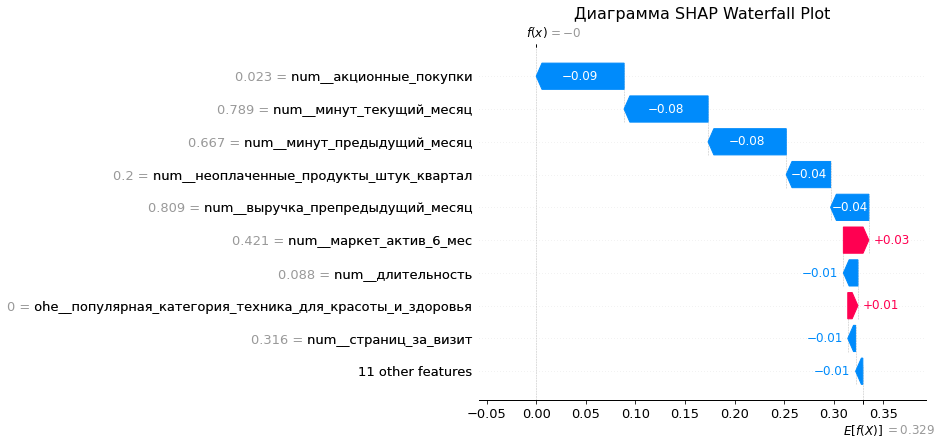

In [66]:
# Построим диаграмму Waterfall Plot

fig, ax = plt.subplots(figsize=(10, 7))
shap.plots.waterfall(shap_values[20], show=False)
plt.title("Диаграмма SHAP Waterfall Plot", fontsize=16)
plt.show()


**Комментарии**

Диаграмма Waterfall Plot показывает, как различные признаки влияют на итоговое предсказание модели, начиная с базового значения и заканчивая итоговым значением. Начальное значение предсказания модели обозначено как f(x) = 0. Каждый признак представлен в виде горизонтальной полосы, которая показывает его вклад в итоговое предсказание. Вклад может быть положительным (красный цвет) или отрицательным (синий цвет). Итоговое предсказание модели, обозначенное как E[f(x)] = 0.329, является результатом суммирования всех вкладов признаков. 

Признаки "num_акционные_покупки", "num_минут_текущий_месяц" и "num_минут_предыдущий_месяц" оказывают наибольшее отрицательное влияние на пользовательскую активность. Признаки "num_неоплаченные_продукты_штук_квартал" и "num_выручка_препредыдущий_месяц" также вносят отрицательный вклад, но в меньшей степени. Признаки "num_маркет_актив_6_мес" и "ord_популярная_категория" оказывают небольшое положительное влияние на пользовательскую активность. Остальные признаки имеют незначительное влияние на итоговое предсказание модели. 

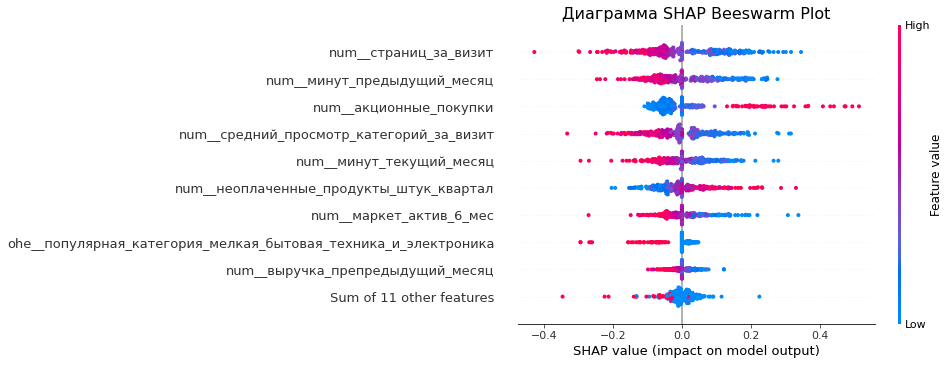

In [67]:
# Построим диаграмму Beeswarm Plot

fig, ax = plt.subplots(figsize=(10, 7))
shap.plots.beeswarm(shap_values, show=False) 
plt.title("Диаграмма SHAP Beeswarm Plot", fontsize=16)
plt.show()


**Комментарии**

Диаграмма Beeswarm Plot показывает вклад каждого признака в итоговое предсказание модели. Ось X показывает влияние признака на выход модели. Положительные значения (справа от 0) указывают на то, что признак увеличивает предсказание, а отрицательные (слева от 0) — уменьшает. Ось Y показывает значения признаков. Чем выше значение признака, тем больше его влияние на предсказание. Цвета точек (красный и синий) указывают на значения признаков. Красные точки соответствуют высоким значениям признака, а синие — низким. Основные выводы:
- "num_страниц_за_визит": увеличение количества страниц, просмотренных за визит, может предотвратить снижение пользовательской активности.
- "num_минут_предыдущий_месяц": увеличение времени, проведенного на сайте в предыдущем месяце, может способствовать сохранению пользовательской активности.
- "num_акционные_покупки": повышение акционных продаж по мнению модели приводит к увеличению вероятности снижения пользовательской активности. 
- "num_неоплаченные_продукты_штук_квартал": наличие неоплаченных продуктов в квартале может привести к снижению активности.

Диаграмма показывает, что признаки, связанные с активностью пользователя ( "num_страниц_за_визит", "num_акционные_покупки", "num_минут_предыдущий_месяц" и "num_средний_просмотр_категорий_за_визит"), сильнее остальных влияют на предсказание модели. 

 

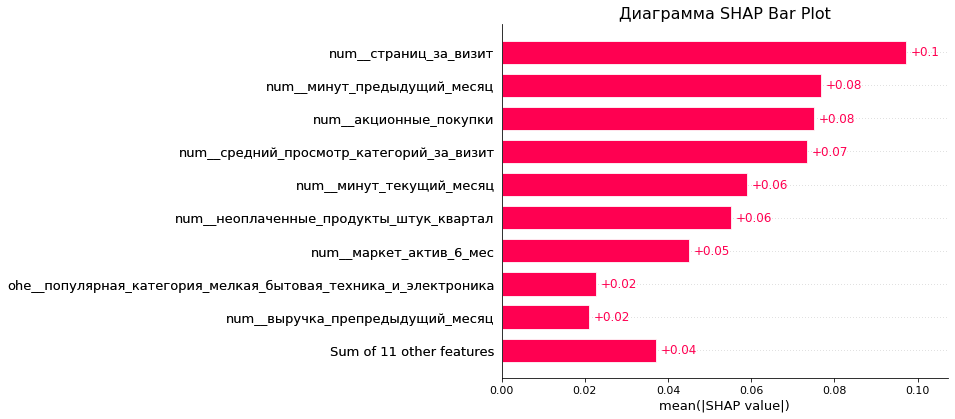

In [68]:
# Построим диаграмму Bar Plot

fig, ax = plt.subplots(figsize=(10, 7))
shap.plots.bar(shap_values, show=False) 
plt.title("Диаграмма SHAP Bar Plot", fontsize=16)
plt.show()


**Комментарии**

Диаграмма  Bar Plot также используется для визуализации важности различных признаков в модели машинного обучения. Ось X показывает среднее значение абсолютного SHAP-значения для каждого признака. Чем больше значение, тем сильнее признак влияет на предсказание модели. Ось Y перечисляет признаки, упорядоченные по их важности. Признаки с наибольшим влиянием находятся в верхней части диаграммы. Цвета обычно используются для обозначения направления влияния признака на предсказание. Красный цвет может указывать на положительное влияние, а синий — на отрицательное. Диаграмма показывает, что наиболее важными признаками для модели являются "num_страниц_за_визит", "num_акционные_покупки", "num_минут_предыдущий_месяц" и "num_средний_просмотр_категорий_за_визит". Эти признаки оказывают наибольшее положительное влияние на предсказание модели. Остальные признаки также вносят свой вклад, но их влияние менее значительно.


**Вывод**

Проанализировав три типа диаграмм SHAP-значений (Waterfall Plot, Beeswarm Plot и Bar Plot), можно сделать следующие выводы:
- Наиболее критичными признаками для оценки пользовательской активности являются показатели продуктового поведения и поведения на сайте ("num_страниц_за_визит", "num_акционные_покупки", "num_минут_предыдущий_месяц"), которые оказывают значительное воздействие на итоговую оценку. 
- Малозначимыми факторами выступают признаки, описывающие коммуникации с клиентом (num_маркет_актив_6_мес) и финансовое поведение (num_выручка_препредыдущий_месяц, num_выручка_предыдущий_месяц).  

## Сегментация покупателей

In [69]:
# Переносим столбец 'id' в индекс

money.set_index('id', inplace=True)

display(money.head(5))

,прибыль
id,
215349,4.16
215350,3.13
215351,4.87
215352,4.21
215353,3.95


In [70]:
# Объединим датафреймы 'money' с данными о прибыльности клиентов и объединенными данными в 'data' 

data_profit = pd.merge(data, money, left_on=data.index, right_on=money.index)
data_profit.rename(columns={'key_0': 'id'}, inplace=True)
data_profit.set_index('id', inplace=True)

# Проверим результат

print(money.shape)
print(data.shape)
print(data_profit.shape)
display(data_profit.head(5))

(1297, 1)
(1296, 17)
(1296, 18)


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
id,,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,4.16
215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,3.13
215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,4.87
215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,4.21
215353,снизилась,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,3.95


### Корреляционный анализ

In [71]:
# Рассчитываем матрицу корреляций phi-k для новых данных

corrmat_profit = data_profit.phik_matrix()
display(corrmat_profit)

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'прибыль']


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,прибыль
покупательская_активность,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.505655,0.224154,0.749888,0.224638,0.497393,0.197213,0.685138,0.576770,0.000000
тип_сервиса,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.120027,0.079515,0.102594,0.000000,0.069704,0.124216,0.131814,0.000000,0.000000
разрешить_сообщать,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.195982,0.021839,0.042134,0.080842,0.000000,0.060907,0.038387,0.000000,0.034982
маркет_актив_6_мес,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.289421,0.142401,0.396769,0.155476,0.315331,0.039795,0.363950,0.330601,0.000000
маркет_актив_тек_мес,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.144203,0.116946,0.000000,0.051824,0.000000,0.000000,0.107945,0.061410,0.095359
длительность,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.192611,0.175608,0.122495,0.125572,0.113200,0.147048,0.026448,0.101481,0.000000
акционные_покупки,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.237962,0.000000,0.311418,0.060733,0.226381,0.071094,0.262324,0.250558,0.000000
популярная_категория,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.248620,0.000000,0.160300,0.252097,0.043528,0.237240,0.195233,0.089883,0.069684
средний_просмотр_категорий_за_визит,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.325578,0.070315,0.262271,0.098440,0.176828,0.092597,0.159837,0.182568,0.021214
неоплаченные_продукты_штук_квартал,0.505655,0.120027,0.195982,0.289421,0.144203,0.192611,0.237962,0.248620,0.325578,1.000000,0.032907,0.363760,0.249171,0.261016,0.230022,0.256632,0.232383,0.000000


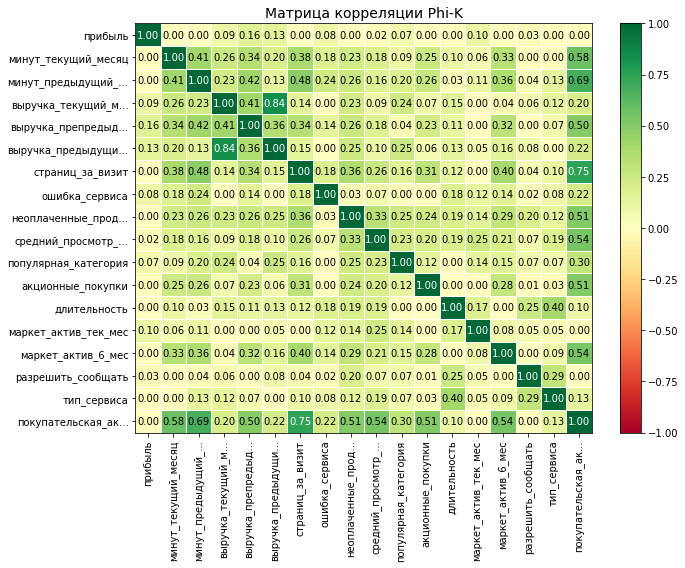

In [72]:
# Отображение корреляционной матрицы в виде тепловой карты

plot_correlation_matrix(corrmat_profit.values,
                        x_labels=corrmat_profit.columns,
                        y_labels=corrmat_profit.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Комментарии**

Матрица корреляции Phi-K показала, что на прибыль незначительно влияют следующие признаки: `выручка_препредыдущий_месяц` (0.16), `выручка_предыдущий_месяц` (0.13),  `маркет_актив_тек_мес` (0.10), `выручка_текущий_месяц` (0.09) и `ошибка_сервиса` (0.08). Эти значения слишком низкие, чтобы говорить о какой-либо взаимосвязи.

### Исследовательский анализ

**Комментарии**

Для бизнеса важно отследить вероятность снижения активности у клиентов, прибыль о которых выше средней, так как это приведет к просадке сегмента и недополучению прибыли в следующем отчетном периоде. Предотвратить это можно, попробовав оказать на этих клиентов воздействие, например, предложив им промо на товары из этих сегментов. Однако акции по удержанию клиентов лучше направлять на тех, кого еще можно удержать. Определим этот порог интервалом от 0.6 до 0.9. Предположим, что воздействие на таких клиентов будет потенциально успешнее.

In [73]:
# На основе лучшей модели предскажем снижение активности у пользователей в тестовой выборке

activity_test = X_test
predicted_activity = randomized_search.predict_proba(activity_test)[:, 1]
activity_test['предсказание_снижения_активности'] = predicted_activity

# Объединим датафреймы 'money' с данными тестовой выборки

segment = activity_test.join(money, how="inner")
segment.rename(columns={'key_0': 'id'}, inplace=True)


# Проверим результат

print(segment.shape)
display(segment.head(5))


(324, 18)


,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказание_снижения_активности,прибыль
id,,,,,,,,,,,,,,,,,,
216161,стандарт,да,4.1,4,606,0.15,техника_для_красоты_и_здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,0.012406,4.69
215654,премиум,нет,1.4,4,684,0.94,товары_для_детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,0.987425,2.75
216307,премиум,да,3.3,4,488,0.13,домашний_текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,0.112119,3.16
215501,премиум,да,3.5,3,1057,0.35,домашний_текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9,0.787920,3.74
215934,стандарт,нет,5.5,4,147,0.99,мелкая_бытовая_техника_и_электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18,0.513170,4.40


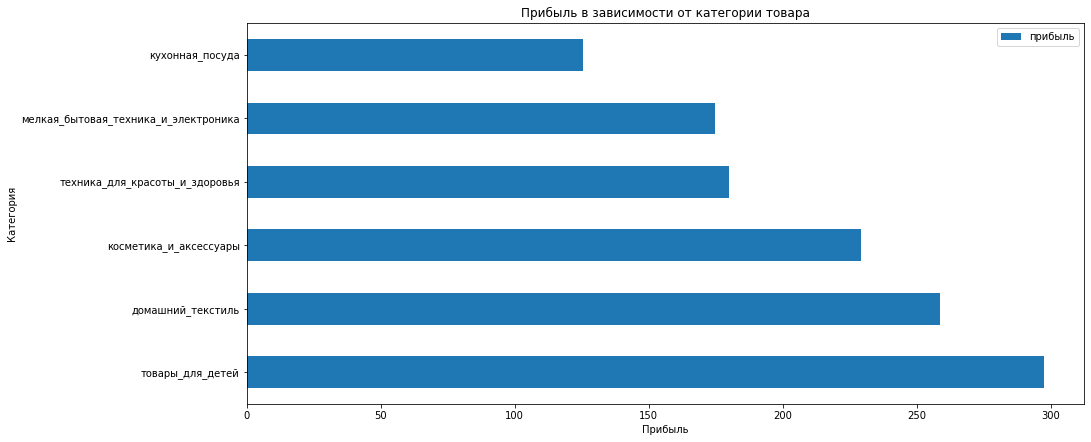

In [74]:
# Визуализируем популярные категории

segment.groupby('популярная_категория')['прибыль'].sum().sort_values(ascending = False).plot(kind = 'barh', legend = True, figsize = (15, 7))
plt.title('Прибыль в зависимости от категории товара')
plt.ylabel('Категория')
plt.xlabel('Прибыль')
plt.show()

#### Клиенты с высокой вероятностью снижения активности и высокой прибылью

In [75]:
# Отсортируем пользователей, у которых высока вероятность снижения активности и их прибыль больше средней

segment_check = segment[(0.6 <= segment['предсказание_снижения_активности']) & 
                       (segment['предсказание_снижения_активности'] <= 0.9) & 
                       (segment['прибыль'] >= segment['прибыль'].mean())]
# Проверим результат

print(segment_check.shape)
display(segment_check.head(5))

(26, 18)


,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказание_снижения_активности,прибыль
id,,,,,,,,,,,,,,,,,,
215390,стандарт,да,3.1,4,152,0.33,косметика_и_аксессуары,6,4,2,5,4254.0,4549.0,4612.8,8,12,0.655905,5.70
215353,стандарт,да,3.3,4,762,0.26,домашний_текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.643041,3.95
215351,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.784381,4.87
216565,стандарт,да,5.2,5,638,0.15,домашний_текстиль,1,5,8,4,4844.0,4908.0,5533.0,17,12,0.622445,4.58
215908,премиум,нет,4.0,4,845,0.12,домашний_текстиль,2,7,6,5,4396.0,4933.0,4991.4,10,12,0.859674,5.26


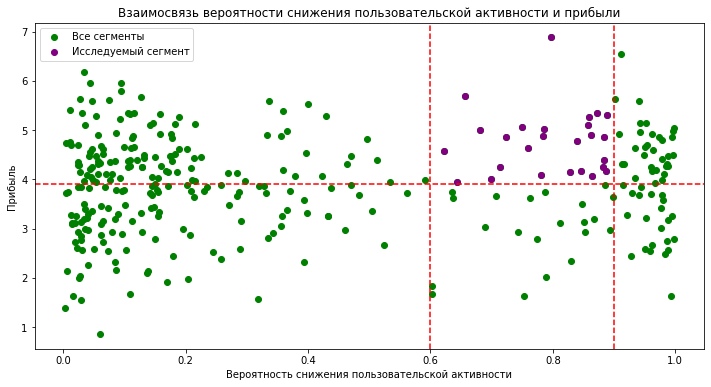

In [76]:
# Визуализируем данные для двух сегментов

plt.figure(figsize=(12, 6))

plt.scatter(data=segment, x='предсказание_снижения_активности', y='прибыль', label='Все сегменты', color='green')
plt.scatter(data=segment_check, x='предсказание_снижения_активности', y='прибыль', label='Исследуемый сегмент', color='purple')
plt.title('Взаимосвязь вероятности снижения пользовательской активности и прибыли')

plt.legend()

plt.axhline(y=3.9, color='red', linestyle='--') # среднее значение прибыли
plt.axvline(x=0.6, color='red', linestyle='--') # порог сортировки
plt.axvline(x=0.9, color='red', linestyle='--') # порог сортировки


plt.xlabel('Вероятность снижения пользовательской активности')
plt.ylabel('Прибыль')

plt.show()

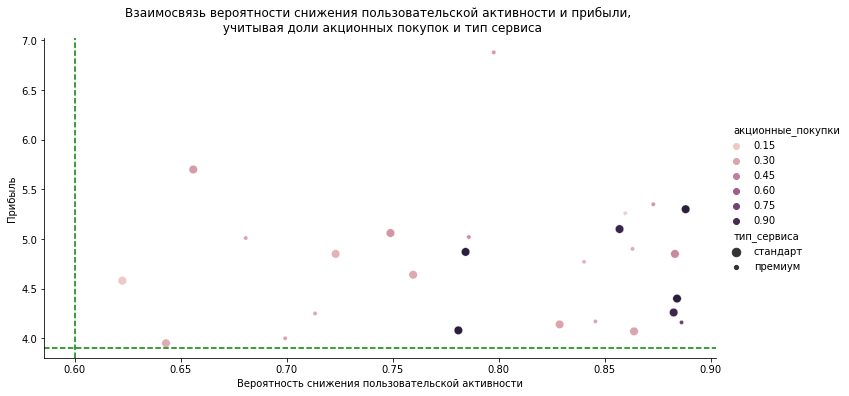

In [77]:
# Визуализируем данные для сегмента

sns.relplot(data = segment_check, x = 'предсказание_снижения_активности', 
            y ='прибыль', 
            hue = 'акционные_покупки', 
            size = 'тип_сервиса', 
            aspect = 2)
plt.title('Взаимосвязь вероятности снижения пользовательской активности и прибыли, \n учитывая доли акционных покупок и тип сервиса')
plt.xlabel('Вероятность снижения пользовательской активности')
plt.ylabel('Прибыль')
plt.axhline(y=3.9, color='green', linestyle='--') # среднее значение прибыли
plt.axvline(x=0.6, color='green', linestyle='--') # порог сортировки

plt.show()

In [78]:
# Рассмотрим распределение популярных категорий для выбранного сегмента

print('Популярные категории:')
display(segment_check['популярная_категория'].value_counts())


Популярные категории:


товары_для_детей                        7
домашний_текстиль                       6
мелкая_бытовая_техника_и_электроника    5
косметика_и_аксессуары                  4
техника_для_красоты_и_здоровья          3
кухонная_посуда                         1
Name: популярная_категория, dtype: int64

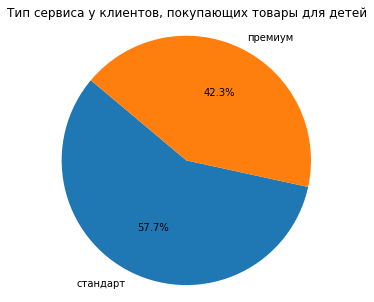

In [79]:
# Построим круговую диаграмму для столбца 'тип_сервиса'

# Данные для круговой диаграммы

counts = segment_check['тип_сервиса'].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
labels = counts.index  # Метки категорий
sizes = counts.values  # Доли значений

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг
plt.title("Тип сервиса у клиентов, покупающих товары для детей")
plt.show()

**Комментарии**

Клиентов, у которых высока вероятность снижения активности и их прибыль больше средней, оказалось не так много в тестовой выборке (26 человек). Для этой категории пользователей можно предложить промокоды на скидку товаров из следующих категори: мелкая бытовая техника и электроника, домашний текстиль, товары для детей.


#### Клиенты,  покупающие товары для детей

In [80]:
# Отсортируем пользователей, у которых высока вероятность снижения активности и их прибыль больше средней

segment_children = segment[(segment['популярная_категория'] == 'товары_для_детей')]

# Проверим результат

print(segment_children.shape)
display(segment_children.head(5))

(78, 18)


,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,предсказание_снижения_активности,прибыль
id,,,,,,,,,,,,,,,,,,
215654,премиум,нет,1.4,4,684,0.94,товары_для_детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,0.987425,2.75
215375,премиум,да,3.0,4,558,0.89,товары_для_детей,3,3,7,4,5253.5,4715.0,5633.1,8,9,0.968018,4.18
216509,премиум,да,5.2,4,833,0.28,товары_для_детей,5,1,8,15,4808.0,4631.0,4784.6,13,15,0.029976,2.57
215452,стандарт,да,3.8,4,756,0.90,товары_для_детей,2,3,6,4,4045.0,4963.0,4206.2,11,10,0.948630,4.50
215484,премиум,нет,2.9,5,448,0.23,товары_для_детей,4,2,6,3,5059.0,4267.0,5018.7,5,7,0.901912,5.64


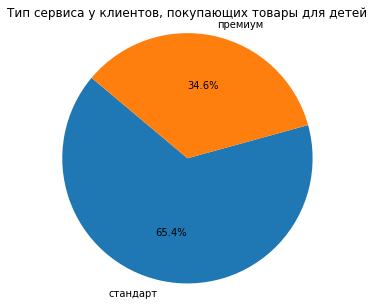

In [81]:
# Построим круговую диаграмму для столбца 'тип_сервиса'

# Данные для круговой диаграммы

counts = segment_children['тип_сервиса'].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
labels = counts.index  # Метки категорий
sizes = counts.values  # Доли значений

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг
plt.title("Тип сервиса у клиентов, покупающих товары для детей")
plt.show()

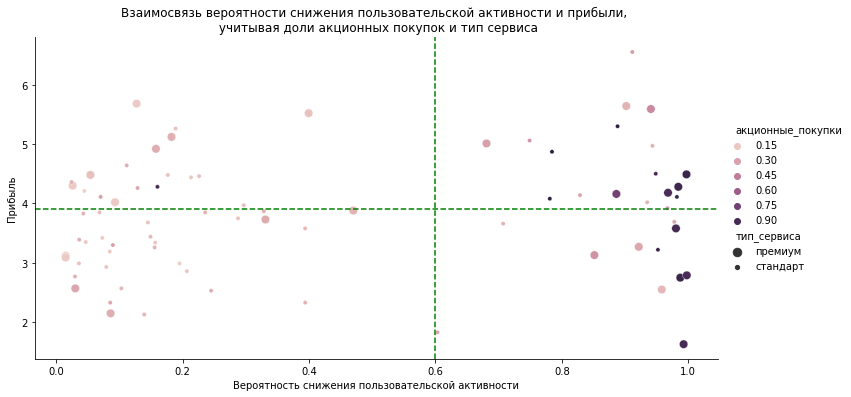

In [82]:
# Визуализируем данные для сегмента

sns.relplot(data = segment_children, x = 'предсказание_снижения_активности', 
            y ='прибыль', 
            hue = 'акционные_покупки', 
            size = 'тип_сервиса', 
            aspect = 2)
plt.title('Взаимосвязь вероятности снижения пользовательской активности и прибыли, \n учитывая доли акционных покупок и тип сервиса')
plt.xlabel('Вероятность снижения пользовательской активности')
plt.ylabel('Прибыль')
plt.axhline(y=3.9, color='green', linestyle='--') # среднее значение прибыли
plt.axvline(x=0.6, color='green', linestyle='--') # порог сортировки

plt.show()

**Комментарии**

Анализируя клиентов, у которых популярная категория "товары для детей", можно сделать следующие выводы:
- У клиентов с высокой вероятностью снижения активности, можно заметить преобладание акционных покупок. 
- Всего треть клиентов пользуется подпиской "премиум".
- В большинстве клиенты этого сегмента не часто покупают товары по акциям.

Для этой категории пользователей можно предложить промокоды на пробный период пользования подпиской и скидки на товары для детей.


**Вывод**

В настоящем разделе мы рассмотрели два сегмента клиентов:
1. Клиенты с высокой вероятностью снижения активности и высокой прибылью.
2. Клиенты, покупающие товары для детей.

Мы выбрали эти категории покупателей, так как первая категория приносит большую прибыль, но при этом эти клиенты собираются уйти, т.е это потенциальная потеря большого количества средств для бизнеса, а вторая категория является лидирующей по объему продаж. 

Исходя из анализа сегментов покупателей можно дать следующие рекомендации для бизнеса:
- Клиенты выбранных категорий почти не используют акционные предложения, возможно стоит их как-то видоизменить, персонализировать, чтобы сделать их более популярными в выбранных группах.
- Подписка "премиум" не пользуется популярностью, ей пользуются около 30-40% пользователей. Возможно стоит подумать над изменением ее возможностей, чтобы привлечь больше клиентов и увеличить их активность.
- Возможно имеет смысл развивать рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее изучение сайта.


## Итоговые выводы

Для настоящего проекта нам были предоставлены подробные данные интернет-магазина «В один клик», который продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.   

**Цель исследования**: Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

В **первом разделе** проекта мы изучили общую информацию о данных. Нам для анализа были предоставлены четыре датасета, которые мы сохранили в четыре переменные: `market_file` для датафрейма с данными о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении; `market_money` для данных о выручке, которую получает магазин с покупателя; `market_time` для данных о времени, которое покупатель провёл на сайте в течение периода; `money` для данных о среднемесячной прибыли продавца за последние 3 месяца. 

Во **втором разделе** проекта мы провели основную предобработку данных в датафреймах, которая включала в себя переименование и  приведение названий столбцов к нижнему регистру, преобразование типа данных в столбцах, где это необходимо, обработку явных и неявных дубликатов. Пропусков в данных нет.

В **третьем разделе** проекта мы провели исследовательский анализ данных и сделали следующие выводы:
- В целом большая часть гистограмм похожи на нормальное распределение. Менее равномерными выглядят столбцы `маркет_актив_6_мес` и `акционные_покупки` в датафрейме `market_file` , но вероятно это индивидуальные особенности покупательского поведения. Все значения находятся в пределах нормы, выбросов и аномалий не наблюдается, в рамках исследовательского анализа обработка данных признаков не требуется.
- Периоды активности в датафреймах `market_time` и `market_money` распределены равномерно.
- Более половины пользователей сохранили прежнюю покупательскую активность (61.8%).
- Всего треть пользователей используют подписку премиум (28.9%). 
- Три четверти пользователей (73.9%) согласны получать маркетинговые рассылки, что показывает их лояльность к сервису. 
- В интернет-магазине представлено шесть крупных категорий товаров (товары для детей, домашний текстиль, косметика и аксессуары, техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда). Распределение предпочтений пользователей примерно равномерно и находится в районе 10-25%. Наиболее приоритетными стали категории "товары для детей" и "домашний текстиль".
- Неизвестно в какой валюте и в каких единицах считается выручка и прибыль, так как значения в датафрейме `market_money` и `money` на порядок отличаются. 

В **четвертом разделе** проекта мы объединили три датафрейма (`market_file`, `market_money` и `market_time`) в один общий датафрейм `data`. Таким образом подготовили данные к дальнейшему корреляционному анализу и обучению модели.

В **пятом разделе** проекта мы провели корреляционный анализ методом Phi-K, который показал, что наиболее выраженная связь между целевым признаком `покупательская_активность` у входных признаков `страниц_за визит` (0.75), `минут_предыдущий_месяц` (0.69), чуть менее заметная у признаков `минут_текущий_месяц` (0.58), `маркет_актив_6_мес` и `средний_просмотр_категорий_за_визит` (0.54), `акционные_покупки` и `неоплаченные_продукты_штук_квартал` (0.51), `выручка_препредыдущий_месяц` (0.50). Признаков мультиколлинеарности не обнаружено. 

В **шестом разделе** проекта мы разработали пайплайн для подготовки данных и выбора оптимальной модели для предсказания снижения пользовательской активности. Достигнув метрики ROC-AUC в 0.89 на тренировочных и 0.88 на тестовых данных, лучше всех себя показала модель  LogisticRegression(C=2, penalty='l1', random_state=42, solver='liblinear').

В **седьмом разделе** проекта мы проанализировали три типа диаграмм SHAP-значений (Waterfall Plot, Beeswarm Plot и Bar Plot), и сделали следующие выводы:
- Наиболее критичными признаками для оценки пользовательской активности являются показатели продуктового поведения и поведения на сайте ("num_страниц_за_визит", "num_акционные_покупки", "num_минут_предыдущий_месяц"), которые оказывают значительное воздействие на итоговую оценку. 
- Малозначимыми факторами выступают признаки, описывающие коммуникации с клиентом (num_маркет_актив_6_мес) и финансовое поведение (num_выручка_препредыдущий_месяц, num_выручка_предыдущий_месяц).  

В **восьмом разделе** проекта мы рассмотрели два сегмента клиентов:
1. Клиенты с высокой вероятностью снижения активности и высокой прибылью.
1. Клиенты, покупающие товары для детей.

Мы выбрали эти категории покупателей, так как первая категория приносит большую прибыль, но при этом эти клиенты собираются уйти, т.е это потенциальная потеря большого количества средств для бизнеса, а вторая категория является лидирующей по объему продаж.

Клиентов, у которых высока вероятность снижения активности и их прибыль больше средней, оказалось не так много в тестовой выборке (25 человек). Для этой категории пользователей можно предложить промокоды на скидку товаров из следующих категорий: мелкая бытовая техника и электроника, домашний текстиль, товары для детей.

Среди клиентов, у которых популярная категория "товары для детей" и высокая вероятность снижения активности, можно заметить преобладание акционных покупок. Всего треть клиентов пользуется подпиской "премиум". Однако в большинстве своем клиенты этого сегмента не часто покупают товары по акциям. Для этой категории пользователей можно предложить промокоды на пробный период пользования подпиской и скидки на товары для детей.

Исходя из анализа сегментов покупателей можно дать следующие рекомендации для бизнеса:
- Клиенты выбранных категорий почти не используют акционные предложения, возможно стоит их как-то видоизменить, персонализировать, чтобы сделать их более популярными в выбранных группах.
- Подписка "премиум" не пользуется популярностью, ей пользуются около 30-40% пользователей. Возможно стоит подумать над изменением ее возможностей, чтобы привлечь больше клиентов и увеличить их активность.
- Возможно имеет смысл развивать рекомендательной системы. Это поможет удержать пользователя на сайте и вдохновить его на дальнейшее изучение сайта.

